In [45]:
#import libraries

import importlib

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import attrs

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer

import joblib

In [2]:
importlib.reload(attrs)

<module 'attrs' from 'd:\\Machine learning\\Projects\\Chronic Kidney Disease Prediction\\attrs.py'>

In [3]:
# load datasets

train_data = attrs.load_dataset('datasets/kidney_disease_train.csv')
test_data = attrs.load_dataset('datasets/kidney_disease_test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 157 to 102
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             275 non-null    float64
 1   bp              271 non-null    float64
 2   sg              244 non-null    float64
 3   al              245 non-null    float64
 4   su              242 non-null    float64
 5   rbc             173 non-null    object 
 6   pc              230 non-null    object 
 7   pcc             276 non-null    object 
 8   ba              276 non-null    object 
 9   bgr             247 non-null    float64
 10  bu              266 non-null    float64
 11  sc              268 non-null    float64
 12  sod             213 non-null    float64
 13  pot             212 non-null    float64
 14  hemo            241 non-null    float64
 15  pcv             229 non-null    float64
 16  wc              203 non-null    object 
 17  rc              187 non-null    o

In [5]:
train_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv
count,275.000000,271.000000,244.000000,245.000000,242.000000,247.000000,266.000000,268.000000,213.000000,212.000000,241.000000,229.000000
mean,51.454545,76.051661,1.017439,1.024490,0.438017,150.186235,56.983835,3.006157,137.255869,4.754245,12.531535,39.165939
std,17.476176,14.256289,0.005746,1.375805,1.073193,77.357144,51.456635,5.850085,11.677123,3.826341,2.882635,8.774388
min,2.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,4.500000,2.700000,3.100000,9.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,100.000000,27.250000,0.900000,135.000000,3.900000,10.500000,33.000000
50%,55.000000,70.000000,1.020000,0.000000,0.000000,124.000000,41.000000,1.300000,138.000000,4.400000,12.700000,41.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,171.500000,64.750000,2.800000,141.000000,4.900000,14.900000,46.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000


In [6]:
train_data.shape

(280, 25)

In [7]:
test_data.shape

(120, 24)

In [8]:
train_data_copy = train_data.copy()

In [9]:
# columns to be dropped
columns_drop = ["rbc", "rc", "wc", 'cad', 'sod', 'pot', 'appet', "pcc", 'ba', 'appet', 'dm', 'pe', 'ane']

train_data_copy = train_data_copy.drop(columns_drop, axis=1)

In [10]:
train_data_copy = train_data_copy.dropna(axis=0)
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 157 to 102
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             167 non-null    float64
 1   bp              167 non-null    float64
 2   sg              167 non-null    float64
 3   al              167 non-null    float64
 4   su              167 non-null    float64
 5   pc              167 non-null    object 
 6   bgr             167 non-null    float64
 7   bu              167 non-null    float64
 8   sc              167 non-null    float64
 9   hemo            167 non-null    float64
 10  pcv             167 non-null    float64
 11  htn             167 non-null    object 
 12  classification  167 non-null    object 
dtypes: float64(10), object(3)
memory usage: 18.3+ KB


In [11]:
train_data_copy.shape

(167, 13)

In [12]:
# save the cleaned data
train_data_copy.to_csv('datasets/kidney_disease_train_clean.csv')

e:\Program files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

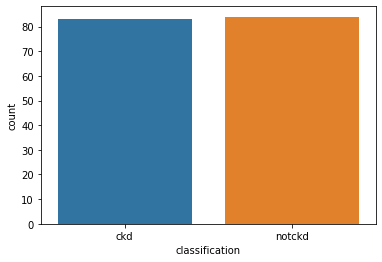

In [13]:
sns.countplot(train_data_copy['classification'],label="Count")

<AxesSubplot:>

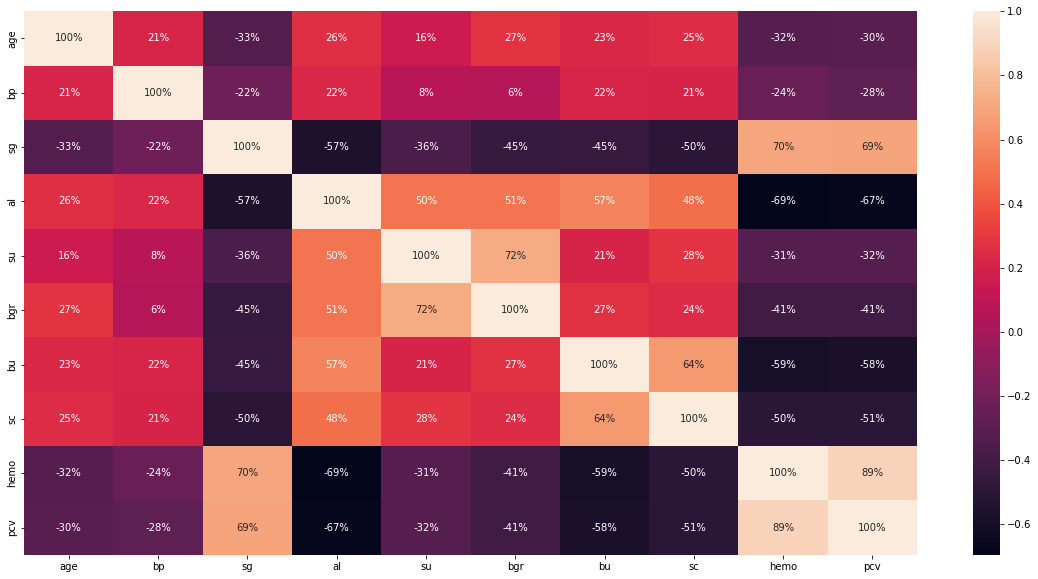

In [14]:
plt.figure(figsize=(20,10))  #This is used to change the size of the figure/ heatmap
sns.heatmap(train_data_copy.corr(), annot=True, fmt='.0%')

In [15]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 157 to 102
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             167 non-null    float64
 1   bp              167 non-null    float64
 2   sg              167 non-null    float64
 3   al              167 non-null    float64
 4   su              167 non-null    float64
 5   pc              167 non-null    object 
 6   bgr             167 non-null    float64
 7   bu              167 non-null    float64
 8   sc              167 non-null    float64
 9   hemo            167 non-null    float64
 10  pcv             167 non-null    float64
 11  htn             167 non-null    object 
 12  classification  167 non-null    object 
dtypes: float64(10), object(3)
memory usage: 22.3+ KB


In [16]:
X = train_data_copy.drop(['classification'], axis=1)
y = train_data_copy['classification']

In [17]:
X.describe()

,age,bp,sg,al,su,bgr,bu,sc,hemo,pcv
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,51.994012,74.550898,1.018084,1.005988,0.401198,146.383234,53.377246,2.378443,12.910180,39.844311
std,16.633359,11.123978,0.005853,1.390575,1.000361,75.754417,42.863276,3.235386,2.763262,8.722617
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,3.100000,9.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,100.000000,28.000000,0.800000,10.900000,33.000000
50%,56.000000,70.000000,1.020000,0.000000,0.000000,123.000000,41.000000,1.200000,13.400000,41.000000
75%,65.000000,80.000000,1.025000,2.000000,0.000000,162.500000,56.000000,2.450000,15.000000,46.500000
max,90.000000,100.000000,1.025000,4.000000,5.000000,490.000000,309.000000,24.000000,17.800000,54.000000


In [18]:
#split the data into 80% training and 20% testing 

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [19]:
# attributes for the pipeline transformations

num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
ordinal_cat_cols = ["pc", "htn"]
nominal_cat_cols = []
cat_cols = ordinal_cat_cols + nominal_cat_cols

# attributes to be generated from existing one
attrs_combination_cols = ["bp_per_age", "bgr_per_su", "bu_per_al"]

In [20]:
# A pipeline for numerical columns transformation

num_pipeline = Pipeline([
    ('attribs_adder', attrs.CombinedAttributesAdder())
])

num_pipeline_scale = Pipeline([
    ('attribs_adder', attrs.CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [21]:
# A pipeline for catgorical columns transformation

cat_pipeline = Pipeline([
    ('ordinal_cat', attrs.MultiColumnLabelEncoder(columns=cat_cols))
])

In [22]:
# Full pipeline for the whole data preparation

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

full_pipeline_scale = ColumnTransformer([
    ('num', num_pipeline_scale, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [23]:
y_transfomer = LabelEncoder()

In [33]:
# Preprocessing the data

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.fit_transform(X_test)

X_train_prepared_scaled = full_pipeline_scale.fit_transform(X_train)
X_test_prepared_scaled = full_pipeline_scale.fit_transform(X_test)

In [25]:
y_train_prepared = y_transfomer.fit_transform(y_train)
y_test_prepared = y_transfomer.fit_transform(y_test)

In [26]:
# trying different algorithms

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



svc_clf = SVC(C=0.05)
svc_clf.fit(X_train_prepared_scaled, y_train_prepared)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_prepared, y_train_prepared)

rmf_clf = RandomForestClassifier(n_estimators=500)
rmf_clf.fit(X_train_prepared, y_train_prepared)

RandomForestClassifier(n_estimators=500)

Support Vector Machine


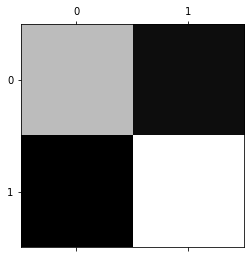

Precision: 0.950
Recall: 1.000
F1: 0.974
Accuracy: 0.971

Decision Tree


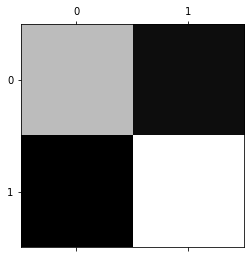

Precision: 0.950
Recall: 1.000
F1: 0.974
Accuracy: 0.971

Random Forest


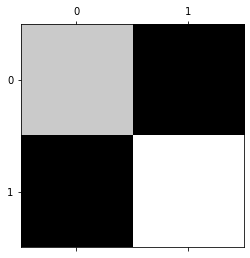

Precision: 1.000
Recall: 1.000
F1: 1.000
Accuracy: 1.000


In [27]:
importlib.reload(attrs)

print("Support Vector Machine")
attrs.analyze_model(svc_clf, X_test_prepared_scaled, y_test_prepared)

print("\nDecision Tree")
attrs.analyze_model(tree_clf, X_test_prepared, y_test_prepared)

print("\nRandom Forest")
attrs.analyze_model(rmf_clf, X_test_prepared, y_test_prepared)

In [57]:
# do a grid search over random forest classifer

# parameters for the grid search on support vector machine classifer


param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'],
                'kernel': ['rbf', 'linear']}


grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=10, scoring='accuracy', return_train_score=True)
grid_search_svc.fit(X_train_prepared_scaled, y_train_prepared)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='accuracy')

In [58]:
grid_search_svc.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

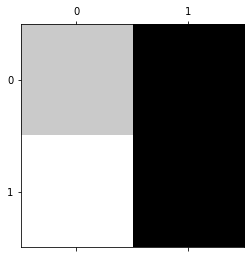

Precision: 0.000
Recall: 0.000
F1: 0.612
Accuracy: 0.441


e:\Program files\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
attrs.analyze_model(grid_search_svc.best_estimator_, X_test_prepared, y_test_prepared)

In [61]:
# do a grid search over random forest classifer

# parameters for the grid search on random forest classifier


param_grid_rmf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_rmf = GridSearchCV(RandomForestClassifier(), param_grid_rmf, cv=5, scoring='accuracy', return_train_score=True)
grid_search_rmf.fit(X_train_prepared, y_train_prepared)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

In [62]:
grid_search_rmf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

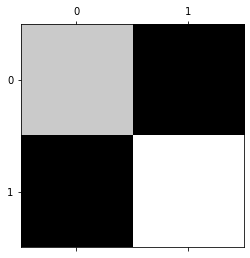

Precision: 1.000
Recall: 1.000
F1: 1.000
Accuracy: 1.000


In [63]:
attrs.analyze_model(grid_search_rmf.best_estimator_, X_test_prepared, y_test_prepared)

In [64]:
joblib.dump(grid_search_rmf.best_estimator_, 'models/kidney_disease_model.pkl')

['models/kidney_disease_model.pkl']

In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 209 to 281
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     116 non-null    float64
 1   bp      117 non-null    float64
 2   sg      109 non-null    float64
 3   al      109 non-null    float64
 4   su      109 non-null    float64
 5   rbc     75 non-null     object 
 6   pc      105 non-null    object 
 7   pcc     120 non-null    object 
 8   ba      120 non-null    object 
 9   bgr     109 non-null    float64
 10  bu      115 non-null    float64
 11  sc      115 non-null    float64
 12  sod     100 non-null    float64
 13  pot     100 non-null    float64
 14  hemo    107 non-null    float64
 15  pcv     101 non-null    object 
 16  wc      92 non-null     float64
 17  rc      83 non-null     float64
 18  htn     119 non-null    object 
 19  dm      119 non-null    object 
 20  cad     119 non-null    object 
 21  appet   119 non-null    object 
 22  

In [69]:
test_data_ = test_data.drop(columns_drop, axis=1)
test_data_ = test_data_.dropna(axis=0)
test_data_prepared = full_pipeline.transform(test_data_)

In [72]:
test_pred = grid_search_rmf.best_estimator_.predict(test_data_prepared)
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [73]:
test_data_['classification'] = test_pred

In [75]:
test_data_

,age,bp,sg,al,su,pc,bgr,bu,sc,hemo,pcv,htn,classification
id,,,,,,,,,,,,,
33,60.0,100.0,1.020,2.0,0.0,abnormal,140.0,55.0,2.5,10.1,29,yes,0
210,59.0,100.0,1.015,4.0,2.0,normal,255.0,132.0,12.8,7.3,20,yes,0
93,73.0,100.0,1.010,3.0,2.0,abnormal,295.0,90.0,5.6,9.2,30,yes,0
84,59.0,70.0,1.010,3.0,0.0,abnormal,76.0,186.0,15.0,7.1,22,yes,0
329,33.0,60.0,1.025,0.0,0.0,normal,80.0,25.0,0.9,14.1,48,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,46.0,70.0,1.025,0.0,0.0,normal,100.0,47.0,0.5,16.4,43,no,1
79,56.0,80.0,1.010,1.0,0.0,normal,165.0,55.0,1.8,13.5,40,yes,0
285,66.0,70.0,1.020,0.0,0.0,normal,94.0,19.0,0.7,16.0,41,no,1


In [ ]:
test_data_.to_csv("datasets/kidney_disease_test_predicted.csv")